In [89]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from sklearn import preprocessing


In [90]:
df = pd.read_csv("features.csv")
df.head()
df = df.dropna()

In [91]:
heartWillGoOn = [{'acousticness': 0.732, 'danceability': 0.428, 'energy': 0.276,  
                 'id': '3oEHQmhvFLiE7ZYES0ulzv', 'instrumentalness': 5.33e-06, 'key': 4, 
                 'liveness': 0.117,'loudness': -11.729,'mode': 1,
                  'speechiness': 0.0312, 'tempo': 99.195, 'valence': 0.0382}]

In [92]:
df = df.append(heartWillGoOn)
df = df.reset_index()
df.tail()

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,index,Unnamed: 0,acousticness,danceability,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
96131,96132,96132.0,0.4520,0.5580,0.2980,189sZsPIyQbxXlLxfROKqS,0.000000,7,0.0931,-13.057,1,0.0279,72.308,0.3010
96132,96133,96133.0,0.0403,0.7530,0.6360,0cQuJEMXzmMGaWJmOhGMue,0.000002,5,0.1580,-9.482,0,0.0321,119.975,0.7810
96133,96134,96134.0,0.9760,0.1470,0.0324,4KvUvF2p3dwxYCbq4LswDA,0.978000,3,0.1140,-30.758,1,0.0418,137.658,0.0397
96134,96135,96135.0,0.9560,0.0662,0.1330,1GaZgdACZXURS0LAD8ypUi,0.931000,8,0.1370,-28.141,0,0.0368,74.823,0.2130
96135,0,NaN,0.7320,0.4280,0.2760,3oEHQmhvFLiE7ZYES0ulzv,0.000005,4,0.1170,-11.729,1,0.0312,99.195,0.0382


In [93]:
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df[['acousticness','danceability','energy','instrumentalness','key',\
                                           'liveness','loudness','mode','speechiness','tempo','valence']])
df_normalized = pd.DataFrame(np_scaled)


In [94]:
df_normalized.columns = ['acousticness','danceability','energy','instrumentalness','key',\
                                           'liveness','loudness','mode','speechiness','tempo','valence']

In [95]:
df_normalized['id'] = df['id']
df_normalized.tail()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,id
96131,0.453815,0.565923,0.2980,0.000000,0.636364,0.093380,0.745837,1.0,0.028793,0.289320,0.3010,189sZsPIyQbxXlLxfROKqS
96132,0.040462,0.763692,0.6360,0.000002,0.454545,0.158475,0.802637,0.0,0.033127,0.480046,0.7810,0cQuJEMXzmMGaWJmOhGMue
96133,0.979920,0.149087,0.0324,0.978000,0.272727,0.114343,0.464601,1.0,0.043137,0.550799,0.0397,4KvUvF2p3dwxYCbq4LswDA
96134,0.959839,0.067140,0.1330,0.931000,0.727273,0.137412,0.506180,0.0,0.037977,0.299383,0.2130,1GaZgdACZXURS0LAD8ypUi
96135,0.734940,0.434077,0.2760,0.000005,0.363636,0.117352,0.766937,1.0,0.032198,0.396901,0.0382,3oEHQmhvFLiE7ZYES0ulzv


In [96]:
df_normalized,heartSong=df_normalized.drop(df_normalized.tail(1).index),df_normalized.tail(1)
heartSong

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,id
96135,0.73494,0.434077,0.276,0.000005,0.363636,0.117352,0.766937,1.0,0.032198,0.396901,0.0382,3oEHQmhvFLiE7ZYES0ulzv


In [159]:
heartSong.to_dict()

{'acousticness': {96135: 0.7349397590361446},
 'danceability': {96135: 0.4340770791075051},
 'energy': {96135: 0.276},
 'instrumentalness': {96135: 5.33e-06},
 'key': {96135: 0.36363636363636365},
 'liveness': {96135: 0.11735205616850553},
 'loudness': {96135: 0.7669367651731809},
 'mode': {96135: 1.0},
 'speechiness': {96135: 0.03219814241486067},
 'tempo': {96135: 0.39690065779997113},
 'valence': {96135: 0.0382},
 'id': {96135: '3oEHQmhvFLiE7ZYES0ulzv'}}

In [98]:
df_normalized.tail()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,id
96130,0.723896,0.504057,0.2850,0.000000,0.181818,0.086359,0.743311,1.0,0.031373,0.491329,0.1820,0wyezCfJkCN8hoU4brz3JZ
96131,0.453815,0.565923,0.2980,0.000000,0.636364,0.093380,0.745837,1.0,0.028793,0.289320,0.3010,189sZsPIyQbxXlLxfROKqS
96132,0.040462,0.763692,0.6360,0.000002,0.454545,0.158475,0.802637,0.0,0.033127,0.480046,0.7810,0cQuJEMXzmMGaWJmOhGMue
96133,0.979920,0.149087,0.0324,0.978000,0.272727,0.114343,0.464601,1.0,0.043137,0.550799,0.0397,4KvUvF2p3dwxYCbq4LswDA
96134,0.959839,0.067140,0.1330,0.931000,0.727273,0.137412,0.506180,0.0,0.037977,0.299383,0.2130,1GaZgdACZXURS0LAD8ypUi


In [119]:
df_normalized['score'] = df_normalized['acousticness'].apply(lambda row: np.abs(row-heartSong['acousticness'])) + \
    df_normalized['danceability'].apply(lambda row: np.abs(row-heartSong['danceability'])) + \
    df_normalized['energy'].apply(lambda row: np.abs(row-heartSong['energy'])) + \
    df_normalized['instrumentalness'].apply(lambda row: np.abs(row-heartSong['instrumentalness'])) + \
    df_normalized['key'].apply(lambda row: np.abs(row-heartSong['key'])) + \
    df_normalized['liveness'].apply(lambda row: np.abs(row-heartSong['liveness'])) + \
    df_normalized['loudness'].apply(lambda row: np.abs(row-heartSong['loudness'])) + \
    df_normalized['mode'].apply(lambda row: np.abs(row-heartSong['mode'])) + \
    df_normalized['speechiness'].apply(lambda row: np.abs(row-heartSong['speechiness'])) + \
    df_normalized['tempo'].apply(lambda row: np.abs(row-heartSong['tempo'])) + \
    df_normalized['valence'].apply(lambda row: np.abs(row-heartSong['valence']))


In [126]:
df_normalized['score'].min()

0.21795901236052018

In [146]:
df_normalized['class'] = df_normalized['score'].apply(lambda row: True if row < 1 else False)
df_normalized.head()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,id,score,class
0,0.573293,0.650101,0.665,0.001070,0.636364,0.159478,0.828742,1.0,0.027141,0.552236,0.677,1vPk6ZTflnvm8LgtXzPDrT,1.943586,False
1,0.720884,0.682556,0.405,0.000268,0.636364,0.122367,0.805164,1.0,0.032301,0.624026,0.652,6OpIhef0IbK0tkEU2m9c4T,1.548795,False
2,0.247992,0.735294,0.488,0.000000,0.636364,0.080341,0.799237,1.0,0.034675,0.496523,0.456,36qxb23eWvnQiJWEMgWYO6,1.862108,False
3,0.516064,0.694726,0.503,0.000028,1.000000,0.082447,0.839307,1.0,0.042931,0.375806,0.807,1FIlg68WTgn0xGL8vPy5Rj,2.250813,False
4,0.790161,0.616633,0.331,0.000000,0.636364,0.324975,0.783413,1.0,0.029928,0.552692,0.709,7oBAMX1mPa2qiqmSunLirZ,1.618470,False


In [147]:
df_normalized['class'].value_counts()

False    93527
True      2608
Name: class, dtype: int64

In [153]:
target = df_normalized["class"]
target_names = ["Not Recommended", "Recommended"]

In [155]:
data = df_normalized.drop(["class", "score","id"], axis=1)
feature_names = data.columns
data.head()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,0.573293,0.650101,0.665,0.001070,0.636364,0.159478,0.828742,1.0,0.027141,0.552236,0.677
1,0.720884,0.682556,0.405,0.000268,0.636364,0.122367,0.805164,1.0,0.032301,0.624026,0.652
2,0.247992,0.735294,0.488,0.000000,0.636364,0.080341,0.799237,1.0,0.034675,0.496523,0.456
3,0.516064,0.694726,0.503,0.000028,1.000000,0.082447,0.839307,1.0,0.042931,0.375806,0.807
4,0.790161,0.616633,0.331,0.000000,0.636364,0.324975,0.783413,1.0,0.029928,0.552692,0.709


In [156]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

k: 1, Train/Test Score: 1.000/0.990
k: 3, Train/Test Score: 0.996/0.991
k: 5, Train/Test Score: 0.995/0.992
k: 7, Train/Test Score: 0.995/0.992
k: 9, Train/Test Score: 0.994/0.992
k: 11, Train/Test Score: 0.994/0.992
k: 13, Train/Test Score: 0.994/0.992
k: 15, Train/Test Score: 0.994/0.992


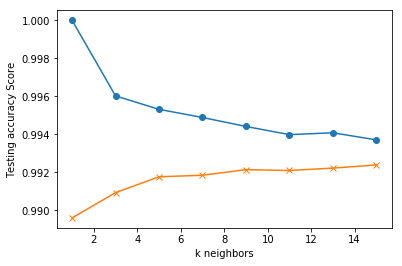

In [157]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 16, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 16, 2), train_scores, marker='o')
plt.plot(range(1, 16, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [158]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print('k=7 Test Acc: %.3f' % knn.score(X_test, y_test))

k=7 Test Acc: 0.992


In [164]:
knn.save("KNN_Training1.h5")

AttributeError: 'KNeighborsClassifier' object has no attribute 'save'

In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)
print('Test Acc: %.3f' % model.score(X_test, y_test))
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

Test Acc: 0.976
                 precision    recall  f1-score   support

Not Recommended       0.98      1.00      0.99     23400
    Recommended       0.69      0.13      0.22       634

    avg / total       0.97      0.98      0.97     24034



In [180]:
scores = model.decision_function(df_normalized[['acousticness','danceability','energy','instrumentalness','key',\
                                           'liveness','loudness','mode','speechiness','tempo','valence']])

In [190]:
df_normalized['predict'] = scores

In [212]:
df_normalized[df_normalized['predict'] < -13 ]

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,id,score,class,predict
48074,0.001265,0.463489,0.127,0.774,0.909091,0.272818,0.347426,0.0,0.847265,0.398777,0.719,4SqeVZtshp7eKkw6TVjlMU,5.304256,False,-13.680793
